In [1]:
import numpy
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import r2_score

x = [a/10 for a in range(23)]
x_cut = [a/10 for a in range(5,23)]
y = [0,0.05,0.12,0.28,0.85,55,134,219,300,384,471,549,634,705,789,867,947,1021,1110,1181,1270,1334,1415]
y_cut = [55,134,219,300,384,471,549,634,705,789,867,947,1021,1110,1181,1270,1334,1415]
y_cut_err = [1/2 for a in range(18)]
y_err = [1/2 for a in range(23)]

for a in range(5):
    y_err[a]=0.01/2

print(x)
print(x_cut)
print(y)
print(y_err)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2]
[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2]
[0, 0.05, 0.12, 0.28, 0.85, 55, 134, 219, 300, 384, 471, 549, 634, 705, 789, 867, 947, 1021, 1110, 1181, 1270, 1334, 1415]
[0.005, 0.005, 0.005, 0.005, 0.005, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


In [2]:
p, cov=numpy.polyfit(x_cut, y_cut, 1, cov=True)
mymodel = numpy.poly1d(p)
myline = numpy.linspace(0.3, 2.3, 100)
a1 = mymodel.coefficients[0]
a0 = mymodel.coefficients[1]

r2=r2_score(y_cut, mymodel(x_cut))
print("R2=%.4f"%r2)
# print("the values are %d %7.5f %s" % (x, y, z))
print(mymodel.coefficients)

print(numpy.sqrt(numpy.diag(cov)))
sigma1,sigma0=numpy.sqrt(numpy.diag(cov))

R2=0.9998
[ 801.14551084 -337.93532852]
[3.00910253 4.35194325]


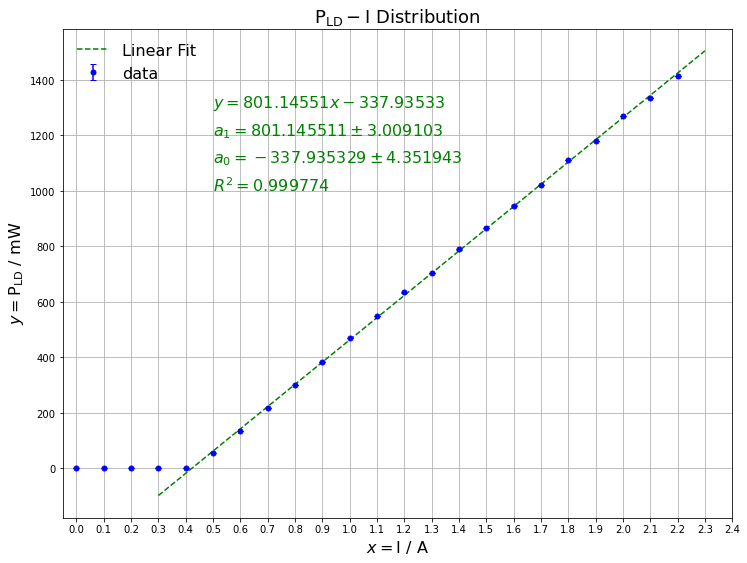

In [6]:
# plt.scatter(x, y, label='data')
plt.figure(figsize=(12,9))
plt.title(r"$\rm P_{LD} - I$ Distribution", fontsize=18)
plt.errorbar(x, y, yerr=y_err,fmt='o', label='data', color='blue', markersize=5, ecolor='blue', capsize=3)
plt.xlabel(r'$x=\rmI\ /\ A$', fontsize=16, color="black") 
plt.ylabel(r'$y=\rm P_{LD}\ /\ mW$', fontsize=16, color="black") 
plt.plot(myline, mymodel(myline), color = 'green', linestyle='dashed', label='Linear Fit')
plt.grid(True)
# plt.axis([30, 400, 100, 400])
# plt.figure()
plt.legend(loc=0, frameon=False, fontsize=16)

ax=plt.gca()
x_major_locator=MultipleLocator(0.1)
y_major_locator=MultipleLocator(200)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim(-0.05,2.4)
#plt.ylim(-5,110)

plt.text(0.5, 1300,r"$y=%.5fx%.5f$"%(a1,a0), fontsize=16,color="green")
plt.text(0.5, 1200, r"$a_1=%f\pm%f$"%(a1,sigma1), fontsize=16,color="green")
plt.text(0.5, 1100, r"$a_0=%f\pm%f$"%(a0,sigma0), fontsize=16,color="green")
plt.text(0.5, 1000, r"$R^2=%f$"%r2, fontsize=16, color="green")

plt.savefig('phyex1_fig.pdf')
plt.show()